In [33]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
distill = pd.read_csv('06_cv_bm_train_distill_models.csv')
train = pd.read_csv('07_cv_train_models.csv')

In [35]:
drop_cols = ['subsample_frac', 'seed', 'save_dir', 'binary_mapper_frac', 'gpu', 'use_cache', 'cat_mappings', 'task_type', 'save_dir_unique',
             'size_interactions', 'post_max_features', 'post_interaction', 'pre_max_features', 'pre_interaction', 'binary_mapper_bit']

In [36]:
distill = distill.drop(columns = drop_cols)
train = train.drop(columns = drop_cols)

In [37]:
models = distill.copy().drop(columns=['distiller_kfold_val_r2','distiller_avg_kfold_val_r2', 'distiller_r2_score_train_true', 'distiller_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher', 'distiller_name'])
models = models.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
models.loc[:, 'distiller_name'] = 'None'

In [38]:
distillers = distill.copy().drop(columns=['teacher_kfold_val_r2','teacher_avg_kfold_val_r2', 'teacher_r2_score_train_true', 'teacher_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher'])
distillers = distillers.rename(columns={'distiller_avg_kfold_val_r2': 'avg_kfold_val_r2', 'distiller_kfold_val_r2':'kfold_val_r2', 
                                        'distiller_r2_score_train_true':'train_r2', 'distiller_r2_score_val_true':'val_r2'})

In [39]:
train = train.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
train.loc[:, 'distiller_name'] = 'None'

In [40]:
results = pd.concat([distillers, models, train], axis = 0)
results

,dataset_name,model_name,distiller_name,binary_mapper_name,binary_mapper_depth,max_depth,max_features,max_rules,max_trees,n_epochs,avg_kfold_val_r2,kfold_val_r2,train_r2,val_r2
0,miami_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,100,0.783519,"[0.7935936177324846, 0.7785769234546562, 0.778...",0.800242,0.751060
1,concrete,rf_plus,ft_distill,dt_binary_mapper,2,4,1.00,60,30,100,0.652333,"[0.6697959203802811, 0.6426053134667642, 0.644...",0.763106,0.773645
2,cpu_act,random_forest,figs,dt_binary_mapper,3,4,1.00,60,30,100,0.882486,"[0.8495969381096802, 0.9185654694145868, 0.879...",0.910823,0.900083
3,ca_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,100,0.602343,"[0.5933728428069511, 0.5996862980375848, 0.613...",0.609230,0.603426
4,abalone,random_forest,ft_distill,dt_binary_mapper,3,4,0.75,60,30,100,0.367042,"[0.3254923381490056, 0.3665016957980639, 0.409...",0.411421,0.391950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,powerplant,ft_transformer,None,no_binary_mapper,2,4,1.00,60,30,100,0.925774,"[0.9256381239492518, 0.9282081926473974, 0.923...",0.934184,0.937562
188,abalone,ft_transformer,None,no_binary_mapper,2,4,1.00,60,30,200,0.419779,"[0.35918569564819336, 0.47371846437454224, 0.4...",0.466371,0.448700
189,cpu_act,ft_transformer,None,no_binary_mapper,2,4,1.00,60,30,100,0.968124,"[0.9685630798339844, 0.9654391407966614, 0.970...",0.975852,0.975469
190,ca_housing,resnet,None,no_binary_mapper,2,4,1.00,60,30,200,0.711328,"[0.7196817215152738, 0.7046080322798741, 0.709...",0.736355,0.705956


In [42]:
results[(results['binary_mapper_name'] == 'gmm_binary_mapper') & (results['binary_mapper_depth'] == 3)]

,dataset_name,model_name,distiller_name,binary_mapper_name,binary_mapper_depth,max_depth,max_features,max_rules,max_trees,n_epochs,avg_kfold_val_r2,kfold_val_r2,train_r2,val_r2
17,concrete,random_forest,figs,gmm_binary_mapper,3,4,1.00,60,30,100,0.501037,"[0.46379739070248305, 0.5360179986287015, 0.50...",0.697433,0.672184
18,abalone,random_forest,figs,gmm_binary_mapper,3,5,1.00,60,30,100,0.442629,"[0.41309650458448044, 0.45333024802085786, 0.4...",0.453316,0.412291
21,cpu_act,rf_plus,ft_distill,gmm_binary_mapper,3,5,1.00,60,30,100,0.954327,"[0.9549638977144246, 0.948826362308977, 0.9591...",0.954807,0.954745
24,cpu_act,random_forest,figs,gmm_binary_mapper,3,4,0.75,60,30,100,0.925326,"[0.9235293366180307, 0.9249973130281074, 0.927...",0.926080,0.926599
27,abalone,rf_plus,ft_distill,gmm_binary_mapper,3,5,1.00,60,30,100,0.447012,"[0.4222547384091385, 0.4424244068622184, 0.476...",0.460931,0.435617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,parkinsons,ft_distill,None,gmm_binary_mapper,3,4,1.00,60,30,100,0.304297,"[0.28499569669127023, 0.3864428956503366, 0.24...",0.371583,0.377378
122,miami_housing,ft_distill,None,gmm_binary_mapper,3,4,1.00,60,30,100,0.788297,"[0.7886738699075773, 0.7679956026158734, 0.808...",0.828538,0.803362
123,ca_housing,ft_distill,None,gmm_binary_mapper,3,4,1.00,60,30,100,0.652924,"[0.6536221381619711, 0.6552350288951536, 0.649...",0.671659,0.663610
124,powerplant,ft_distill,None,gmm_binary_mapper,3,4,1.00,60,30,100,0.915541,"[0.9223618245080146, 0.9091368740815591, 0.915...",0.916447,0.919451


In [43]:
results['diff_r2'] = results['val_r2'] - results['train_r2']
results = results.sort_values('diff_r2', ascending=False)
results['diff_r2_rank'] = np.arange(1, results.shape[0]+1)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_histogram_for_dataset(df, dataset_name):
    # Set the aesthetics for the plots
    sns.set_context("talk", font_scale=5)
    sns.set(style="whitegrid")

    # Create a catplot for model_name and distiller_name
    sns.set(font_scale=1.25)
    g = sns.catplot(
        data=df,
        x='model_name',
        y='val_r2',
        hue='distiller+binary_mapper',
        kind='bar',
        height=6,
        aspect=2,
    )
    
    # Set the title and labels
    if dataset_name == 'all datasets':
        g.fig.suptitle(f'Average Validation R2 Scores by BM, Model, and Distiller Combination ({dataset_name})', fontsize=25)
    else:
        g.fig.suptitle(f'Best Validation R2 Scores by BM, Model, and Distiller Combination ({dataset_name})', fontsize=25)
    g.set_axis_labels("Model Name", "Validation R2 Score", fontsize=25)
    g._legend.set_title('Distiller Name')
    sns.move_legend(g, bbox_to_anchor=(1,0.5), loc="center left", markerscale=5, title="distiller+bm combo")
    
    # Adjust the layout
    plt.yticks(ticks=np.arange(0, 1.09, 0.1))
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    g.savefig(f'plots/{dataset_name}_val_r2.png', bbox_inches='tight')
#hue=df[['distiller_name', 'binary_mapper_name']].apply(tuple, axis =1)

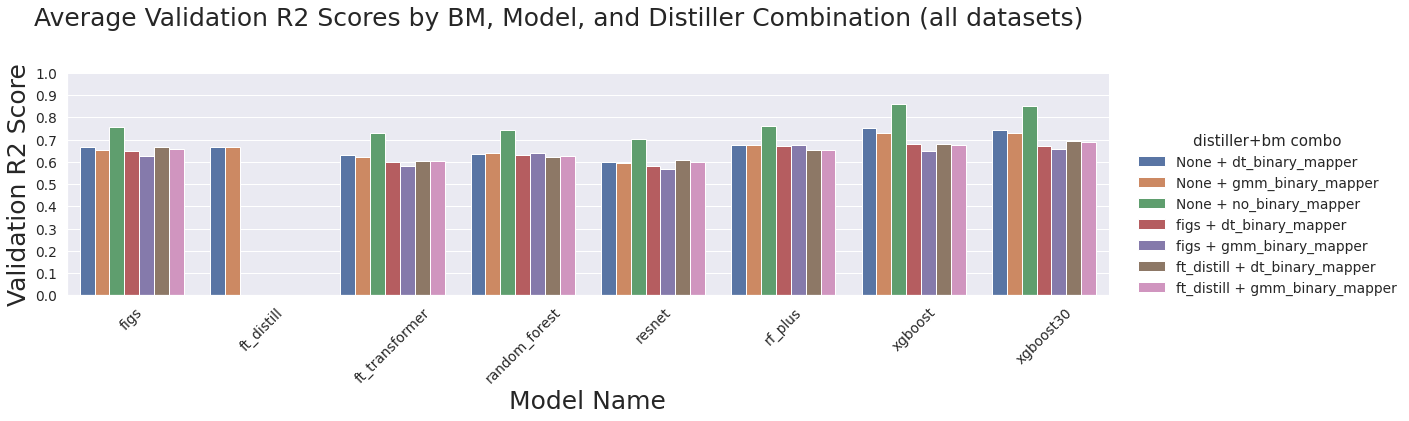

In [45]:
df = results.groupby(['model_name', 'distiller_name', 'binary_mapper_name'])['val_r2'].mean().reset_index() #.apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])
df.loc[:, 'distiller+binary_mapper'] = df['distiller_name'] + ' + '+ df['binary_mapper_name'] #(df['distiller_name'] == 'None').map(lambda x: 'original_model' if x else '') + (df['distiller_name'] + " + " + df['binary_mapper_name'])*(df['distiller_name'] != 'None').to_numpy()
plot_histogram_for_dataset(df, 'all datasets')

/tmp/ipykernel_49730/3076742526.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cur_df = results[results['dataset_name'] == dn].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='train_r2', ascending=False).iloc[0,:])#.reset_index()
/tmp/ipykernel_49730/3076742526.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cur_df = results[results['dataset_name

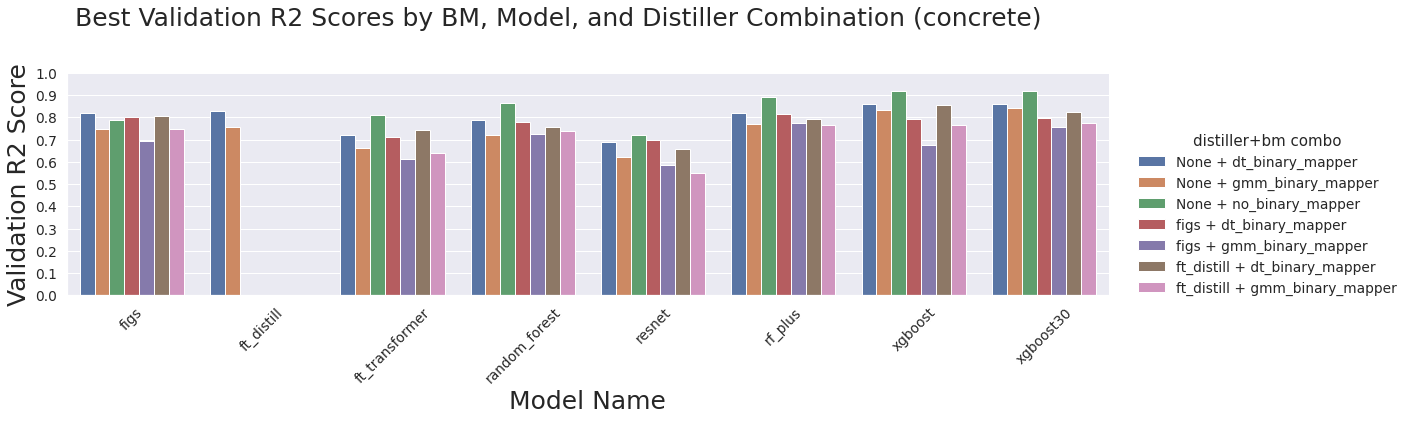

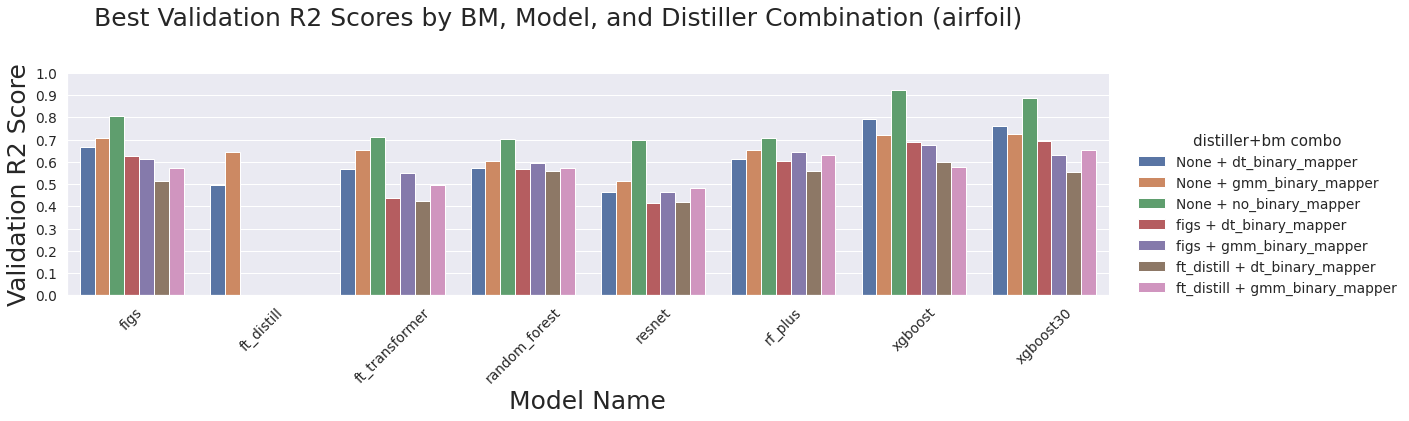

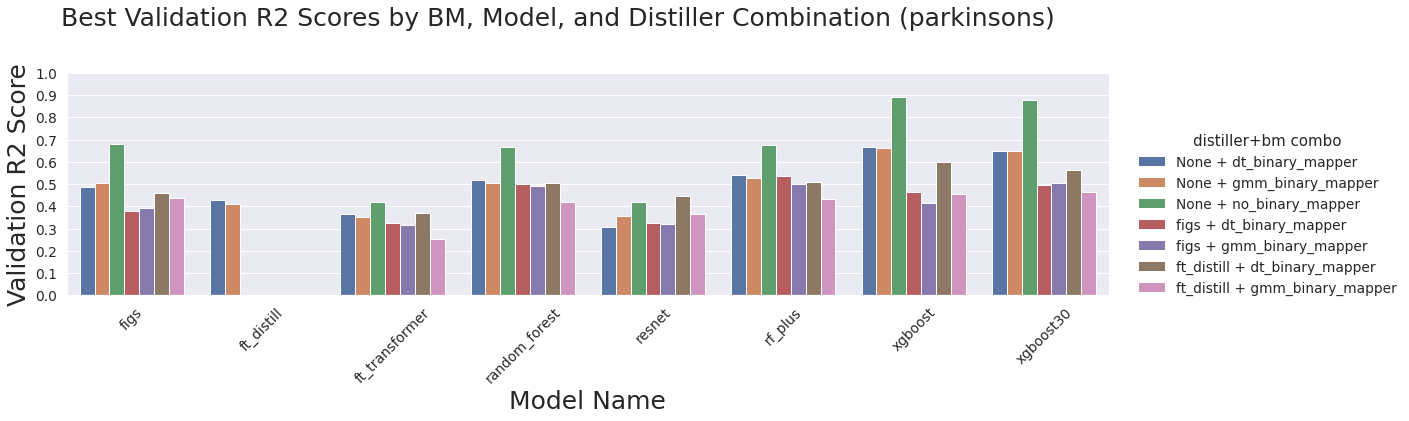

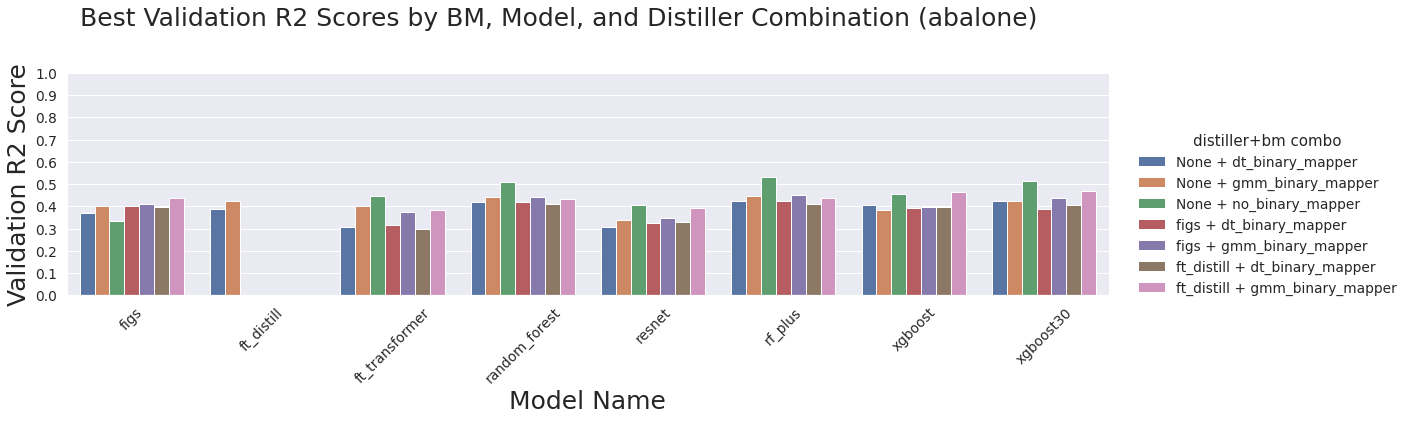

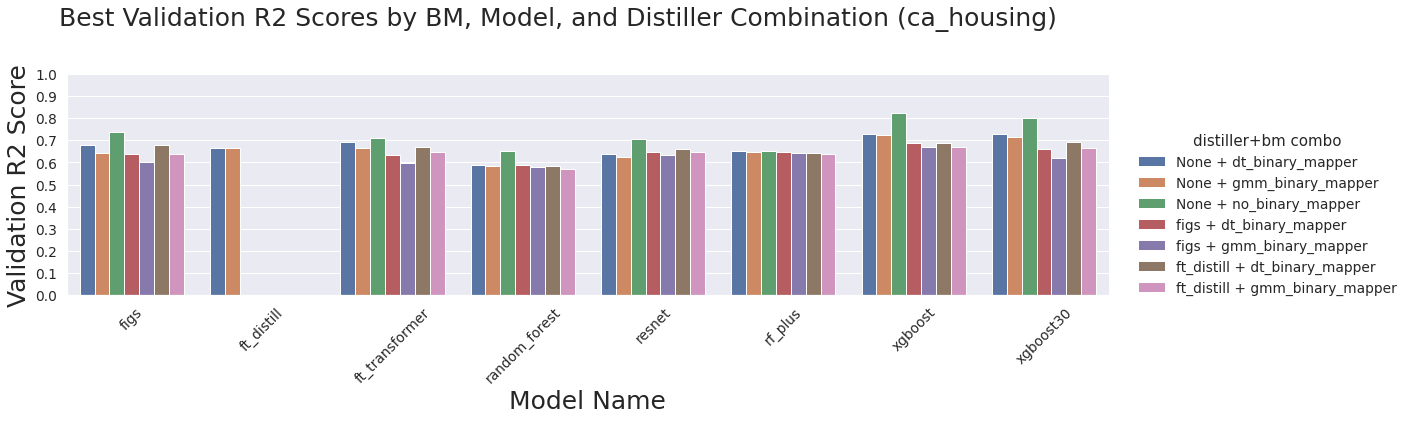

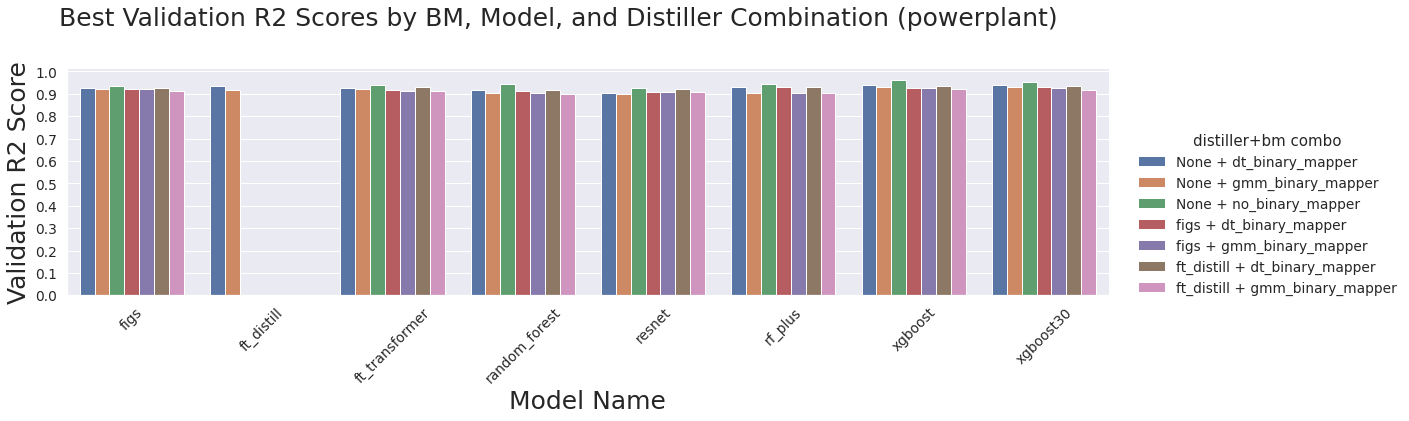

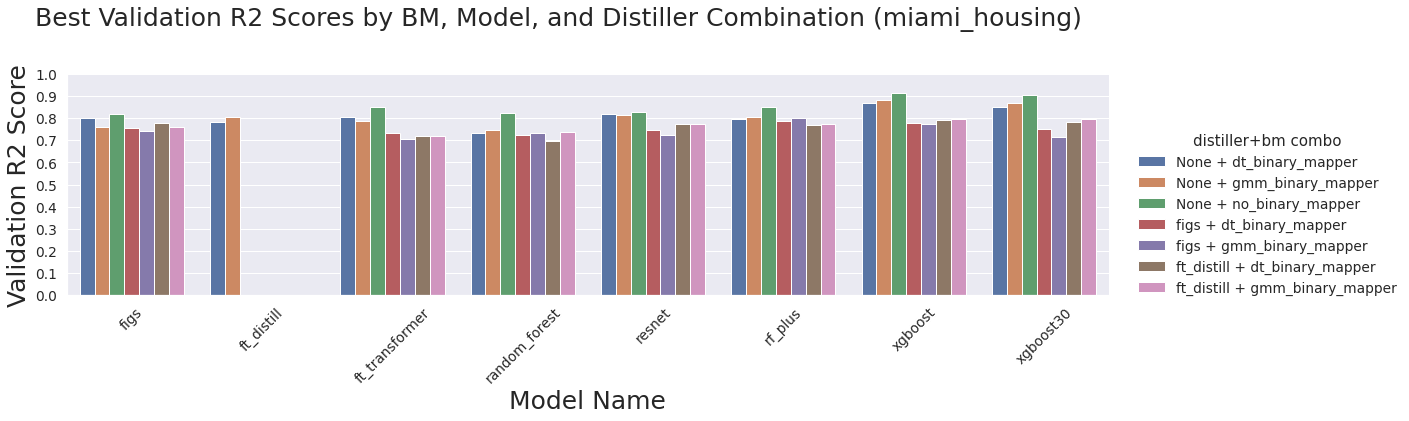

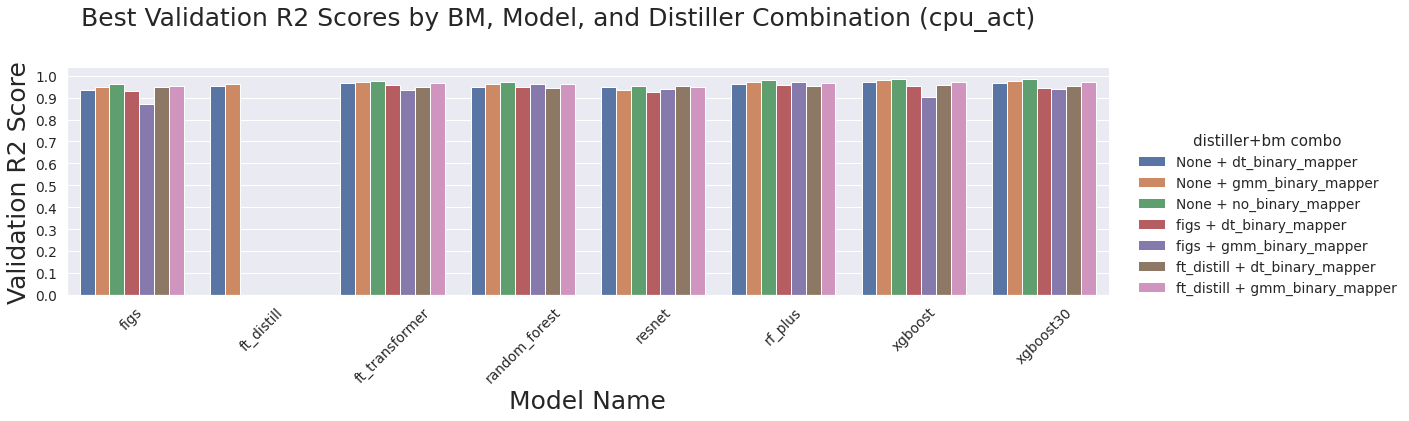

In [46]:
for dn in results['dataset_name'].unique():
    cur_df = results[results['dataset_name'] == dn].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='train_r2', ascending=False).iloc[0,:])#.reset_index()
    cur_df.loc[:, 'distiller+binary_mapper'] = cur_df['distiller_name'] + ' + '+ cur_df['binary_mapper_name']
    plot_histogram_for_dataset(cur_df, dn)